# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv('data/cars.csv')
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [71]:
# Load data
df = pd.read_csv("./data/cars.csv")
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

  Vehicle Size Vehicle Style  highway MPG  city mpg  Popularity   MSRP  
0      Compact         Coupe           26        19        3916  46135  
1      Compact   Convertible           28        19        3916  40650  
2      Compact         Coupe           28        20        3916  36350  
3      Compact         Coupe           28        18        3916  29450  
4      Compact   Convertible           28        18        3916  34500

# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [72]:
# 1. Print the number of duplicate rows we have in our dataframe.
df.duplicated().sum()

720

In [73]:
#  2. Modify our df to have all duplicate rows removed. 
df.drop_duplicates(inplace=True)
print(df.shape)

(11194, 15)


In [74]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [75]:
# * Which column has the most null values and how many null values does it have?
df.apply(lambda col: col.isna().sum())

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [76]:
# * Print how long our dataframe is.
df.shape[0]

11194

In [77]:
# * Remove any row that has a null value in it. 
df.dropna(inplace=True)

In [78]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
df.shape[0]

11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:>

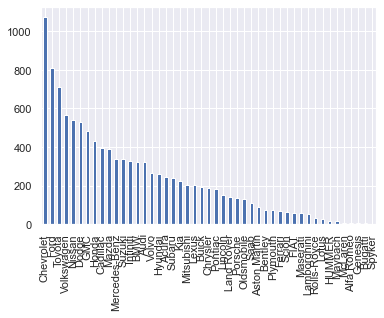

In [82]:
# Make a bar chart that displays how many times each brand of car appears in this data.
df['Make'].value_counts().plot.bar()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

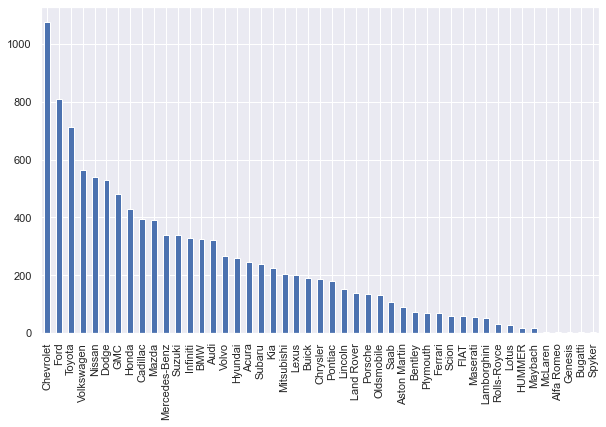

In [83]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
plt.figure(figsize=(10,6))
df['Make'].value_counts().plot.bar()
plt.show()

# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


<Figure size 720x432 with 0 Axes>

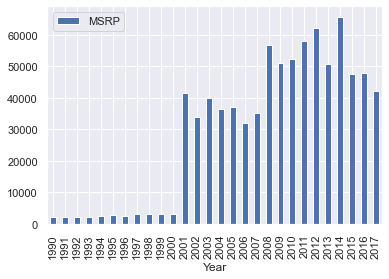

In [84]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
newdf = df.groupby('Year', as_index= False)['MSRP'].mean()
plt.figure(figsize=(10,6))
newdf.plot.bar(x='Year',y='MSRP')
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [85]:
# Make a column where is 10 when year is less than 2000, else 1.
newdf['adjusted_price'] = np.where(newdf['Year'] <= 2000, newdf['MSRP']*10, newdf['MSRP'])
# Multiply the MSRP by the price adjuster.

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<Figure size 720x432 with 0 Axes>

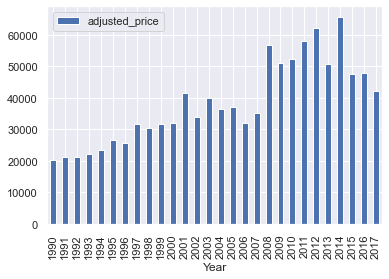

In [86]:
# Plot new prices
plt.figure(figsize=(10,6))
newdf.plot.bar(x='Year',y='adjusted_price')
plt.show()


# Plot the relationship between Engine HP and highway MPG

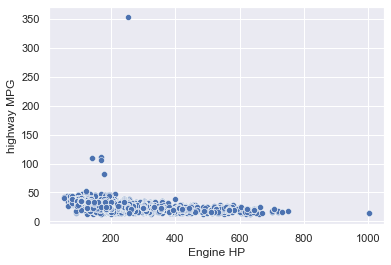

In [87]:
# Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

In [88]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
df = df[(df['Engine HP'] <= 800) & (df['highway MPG'] < 80)]


# Replot the relationship between Engine HP and highway MPG


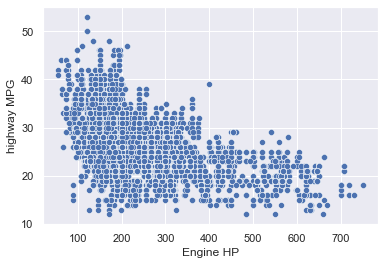

In [89]:
# Re-Plot the relationship between Engine HP and highway MPG
sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

# Make a scatter plot of Engine HP vs highway MPG

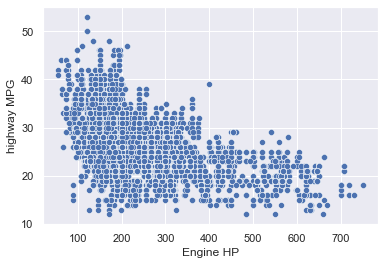

In [90]:
# Make a scatter plot of Engine HP vs highway MPG
sns.scatterplot(data=df, 
                x='Engine HP', 
                y='highway MPG');

# What does this plot tell you about how Engine HP affects highway MPG?

In [ ]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('The Higher the Engine horsepower the lower the highway mpg.')

# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

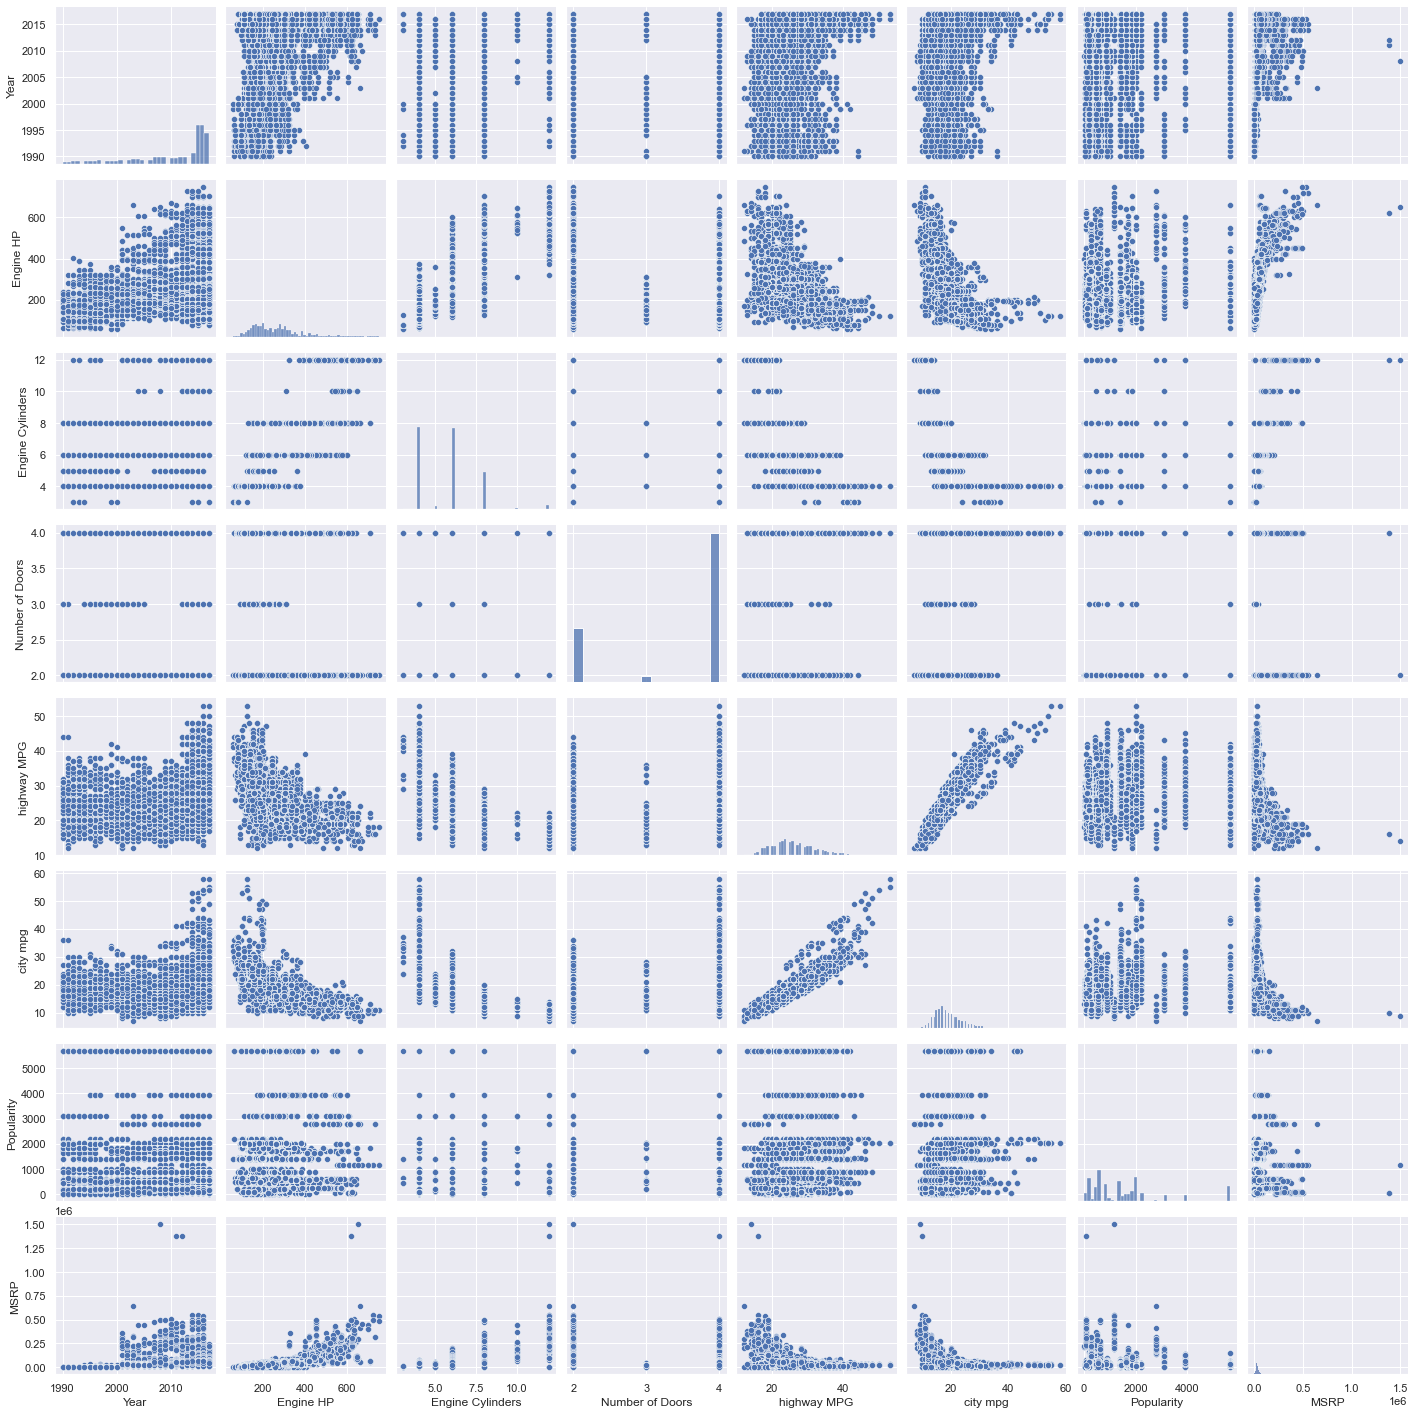

In [93]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(data=df)
plt.show()

In [94]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

print('highway mpg and city mpg')

highway mpg and city mpg


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

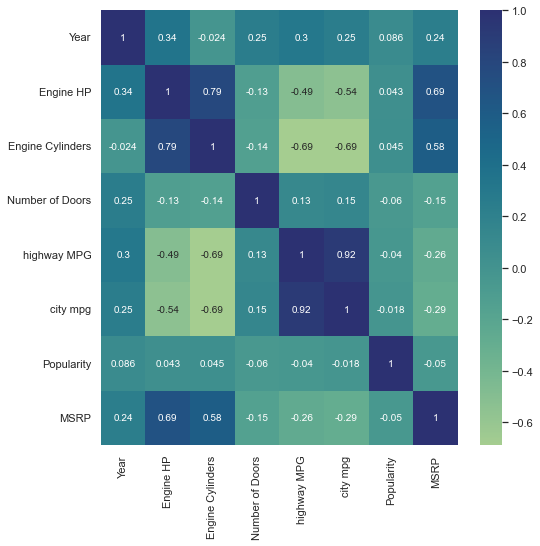

In [97]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap='crest');

In [ ]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Your answer here')

# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


